In [1]:
# No show warnings
import warnings
warnings.filterwarnings("ignore")
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [145]:
# Import libraries standard
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [147]:
# Import modules of tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.backend import clear_session

## Dataset

In [405]:
# Upload data from the library sklearn
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [407]:
# Shape of features in train and test sets
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

Dimension of first image:  (28, 28)


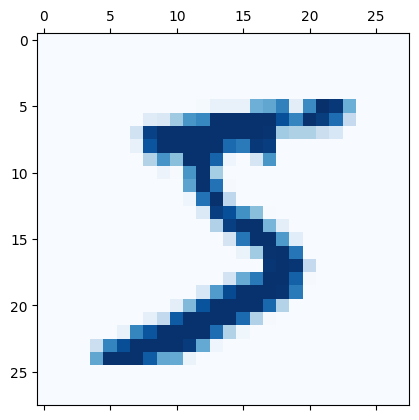

In [167]:
# Each sample is a image (the train set has 60000 images, every one with size 28 x 28)
print("Dimension of first image: ", x_train[0].shape)
plt.matshow(x_train[0], cmap="Blues")
plt.show()

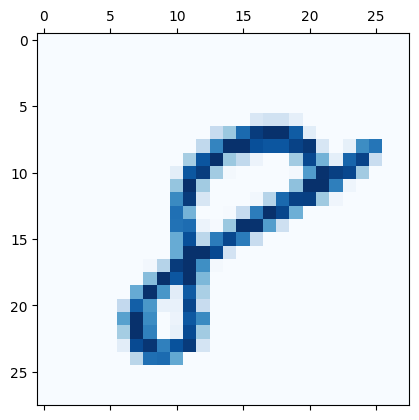

In [169]:
# Show the last sample in train set
plt.matshow(x_train[-1], cmap="Blues")
plt.show()

In [157]:
# Shape of target in train and test sets
y_train.shape, y_test.shape

((60000,), (10000,))

In [171]:
# See which values include y_train
# Using numpy
print(np.unique(y_train))

# Using set()
print(set(y_train))

[0 1 2 3 4 5 6 7 8 9]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [153]:
# Distribution target in train set
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

That means class 0 has 5923 samples, class 1 has 6742 samples, and so on

In [226]:
# Distribution target in train set but more clear to see
np.array(np.unique(y_train, return_counts=True)).T      # T --> means transposed

array([[   0, 5923],
       [   1, 6742],
       [   2, 5958],
       [   3, 6131],
       [   4, 5842],
       [   5, 5421],
       [   6, 5918],
       [   7, 6265],
       [   8, 5851],
       [   9, 5949]], dtype=int64)

In [155]:
# Distribution target in test set
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

## Preprocessing

In [174]:
# Each image is 28 x 28 
img_sample = x_train[0]
img_sample.shape

(28, 28)

In [184]:
# We can change the matrix without lost information
img_flat = np.reshape(img_sample, (1, 784))
img_flat.shape

(1, 784)

In [188]:
# We can recover the previous format
img_recover = np.reshape(img_flat, (28, 28))
img_recover.shape

(28, 28)

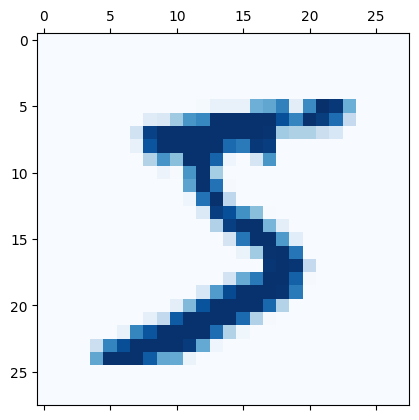

In [196]:
# We have the same image 
plt.matshow(img_recover, cmap="Blues")
plt.show()

In [206]:
# Modify all train set
x_train_flat = np.reshape(x_train, (60000, 28*28))
x_train_flat.shape

(60000, 784)

In [208]:
# Modify all test set
x_test_flat = np.reshape(x_test, (10000, 28*28))
x_test_flat.shape

(10000, 784)

In [212]:
# Apply normalization
x_train_flat = x_train_flat / 255
x_test_flat = x_test_flat / 255

In [224]:
print(f"Max value: {x_train_flat.max()} \nMin value: {x_train_flat.min()}")

Max value: 1.0 
Min value: 0.0


## Sequential model with Keras

In [244]:
# Create a function to create Sequential model (in this case a Multi-Layer Perceptron) 
def get_mnist_model():
    model = Sequential()
    model.add(InputLayer(input_shape = (784,)))
    model.add(Dense(units=500, activation="relu")) # Dense -> fully connected layer (Every neuron in one layer is connected to every neuron in the next layer
    model.add(Dense(units=400, activation="relu"))
    model.add(Dense(units=10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

In [246]:
# frees up memory used by TensorFlow and resets the Keras backend.
clear_session()

In [248]:
# Create the model
model = get_mnist_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 400)            │       200,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         4,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 596,910 (2.28 MB)

 Trainable params: 596,910 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

## Training

In [250]:
# Train the model 
# epochs = the entire dataset is passed through the model 10 times, batch_size = 32 samples are processed at a time before updating weights
hist = model.fit(x_train_flat, y_train, epochs=10, verbose=1, batch_size=32, \
          validation_data=(x_test_flat, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9030 - loss: 0.3114 - val_accuracy: 0.9706 - val_loss: 0.0949
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.9752 - loss: 0.0853 - val_accuracy: 0.9765 - val_loss: 0.0800
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 9ms/step - accuracy: 0.9827 - loss: 0.0611 - val_accuracy: 0.9757 - val_loss: 0.0944
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.9876 - loss: 0.0463 - val_accuracy: 0.9809 - val_loss: 0.0831
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9904 - loss: 0.0350 - val_accuracy: 0.9805 - val_loss: 0.1017
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9914 - loss: 0.0279 - val_accuracy: 0.9822 - val_loss: 0.0904
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9937 - loss: 0.0222 - val_accuracy: 0.9834 - val_loss: 0.0864
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9952 - lo

In [264]:
# Object hist
hist.history

{'accuracy': [0.9420666694641113,
  0.975600004196167,
  0.982616662979126,
  0.9869333505630493,
  0.9898333549499512,
  0.9912166595458984,
  0.9927666783332825,
  0.994616687297821,
  0.9951500296592712,
  0.996150016784668],
 'loss': [0.1890336126089096,
  0.08611758798360825,
  0.06267422437667847,
  0.048804979771375656,
  0.038263335824012756,
  0.03031434305012226,
  0.026584500446915627,
  0.020042046904563904,
  0.01759929396212101,
  0.014263688586652279],
 'val_accuracy': [0.9706000089645386,
  0.9764999747276306,
  0.9757000207901001,
  0.98089998960495,
  0.9804999828338623,
  0.982200026512146,
  0.9833999872207642,
  0.982699990272522,
  0.9800999760627747,
  0.9835000038146973],
 'val_loss': [0.09490440785884857,
  0.07995537668466568,
  0.09440291672945023,
  0.08306285738945007,
  0.10166063904762268,
  0.0904119610786438,
  0.08644601702690125,
  0.10453376173973083,
  0.11925680935382843,
  0.10417142510414124]}

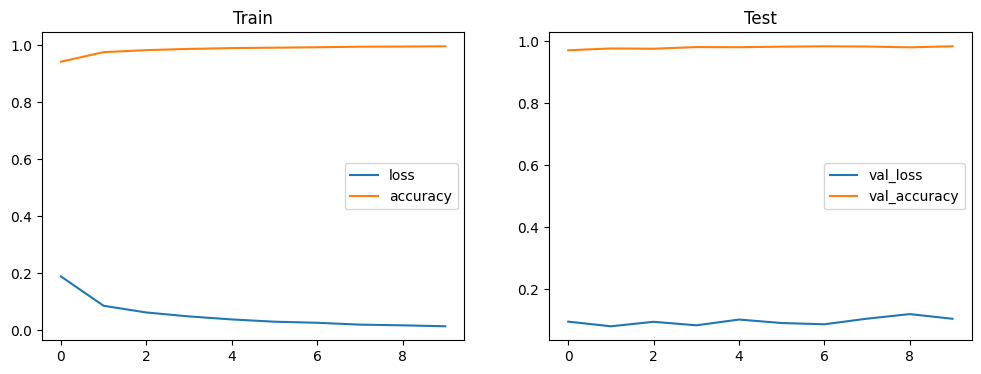

In [266]:
# Create a new figure for the plots
plt.figure(figsize=(12, 4))

# First subplot
plt.subplot(1,2,1)
plt.plot(hist.history["loss"], label=["loss"])
plt.plot(hist.history["accuracy"], label=["accuracy"])
plt.legend()
plt.title("Train")

# Second subplot
plt.subplot(1,2,2)
plt.plot(hist.history["val_loss"], label=["val_loss"])
plt.plot(hist.history["val_accuracy"], label=["val_accuracy"])
plt.legend()
plt.title("Test");

The accuracy is near to 1 and the loss (error) is near to 0, that means our model works well.

## Try now to create a binary classifier

In [291]:
# Modify y_train and y_test to have only two values (0, 1)
print("Values in the target before", set(y_train))

y_train_bin = y_train % 2
y_test_bin = y_test % 2

print("Values in the target aftet (0 represents even numbers, 1 represents odd numbers) \n", set(y_train_bin))

Values in the target before {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Values in the target aftet (0 represents even numbers, 1 represents odd numbers) 
 {0, 1}


## Sequential Model with only two neurons in output

In [294]:
# Create the function for neural networks
def get_seq_model():
    seq_model = Sequential()
    seq_model.add(InputLayer(input_shape = (784,)))
    seq_model.add(Dense(units=500, activation="relu"))
    seq_model.add(Dense(units=500, activation="relu"))
    seq_model.add(Dense(units=2, activation="softmax"))
    seq_model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return seq_model

In [308]:
clear_session()

In [309]:
# Create the model
seq_model = get_seq_model()

In [312]:
# Train the model
# The validation_data allow to evaluate at the end of each epoch the model
# The model does NOT update weights using validation data (it’s just for checking performance).
seq_model.fit(x_train_flat, y_train_bin, epochs=2, \
              validation_data=(x_test_flat, y_test_bin))

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9409 - loss: 0.1537 - val_accuracy: 0.9820 - val_loss: 0.0545
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9852 - loss: 0.0490 - val_accuracy: 0.9842 - val_loss: 0.0492


In [313]:
# Calculates loss and accuracy on the test set AFTER training is complete
seq_model.evaluate(x_test_flat, y_test_bin)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9828 - loss: 0.0510


[0.04921400919556618, 0.9842000007629395]

## Principal Component Analysis

In [409]:
# Import module
from sklearn.decomposition import PCA

In [411]:
# Take only the first 100 images
x_train_pca = x_train[:100]
y_train_pca = y_train[:100]

In [413]:
x_train_pca.shape

(100, 28, 28)

In [415]:
# Reshape the images to have only two dimensions
x_train_pca = np.reshape(x_train_pca, (100, 784))

In [417]:
x_train_pca.shape

(100, 784)

In [419]:
# Execute PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train_pca)

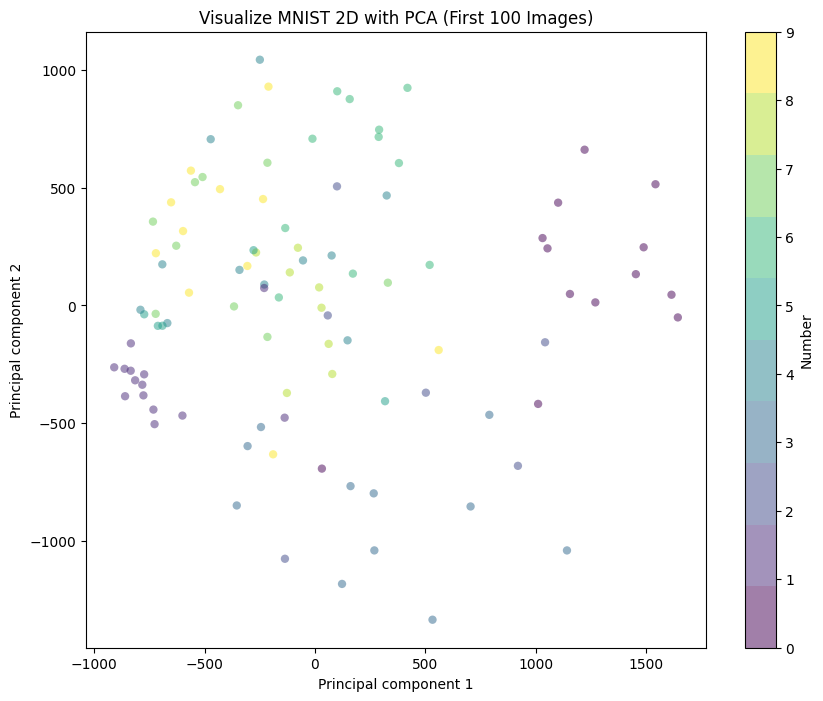

In [421]:
# Create the graph to represent these 100 images in the 2D space
plt.figure(figsize=(10, 8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_train_pca.astype(int), edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('viridis', 10))
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.colorbar(label='Number')
plt.title('Visualize MNIST 2D with PCA (First 100 Images)')
plt.show()